In [45]:
#outliear detection removing : normal_distribution 

In [14]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_regression 

x , y = make_regression(n_samples= 100 , n_features= 4 , noise= 20) 
df = pd.DataFrame(x)
df['target'] = y
import seaborn as sns 

/var/folders/0s/mb0_47nd00vb9xhzh52jg6z00000gn/T/ipykernel_29347/2411426060.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[3])


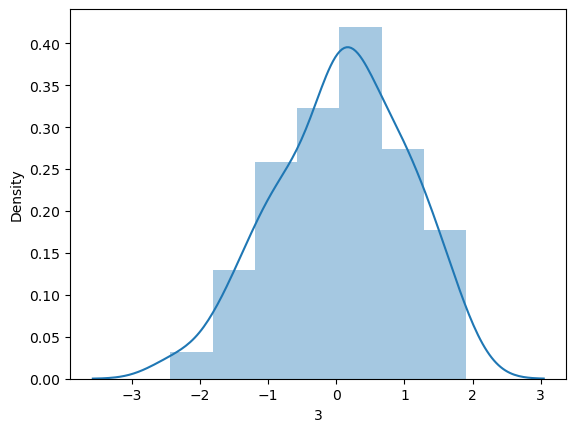

In [27]:
import matplotlib.pyplot as plt 
df.columns

sns.distplot(df[3])
plt.show()

In [31]:
print(df[3].mean())
print(df[3].std())
print(df[3].min())
print(df[3].max())

0.07304190415838743
0.9539994327269983
-2.431436417675275
1.904449679072035


In [32]:
#fitting the bountry values : 
lower_bountry = df[3].mean()+ 3* df[3].std()
upper_bountry = df[3].mean()- 3* df[3].std()
print(lower_bountry)
print(upper_bountry)

2.9350402023393825
-2.788956394022607


In [39]:
df[(df[3] <lower_bountry ) | (df[3] > upper_bountry)] 

,0,1,2,3,target
0,1.195739,0.409336,0.351664,-0.423783,1.056868
1,-1.443011,-1.257655,-0.001601,1.107998,42.471567
2,-0.047221,-1.809685,1.113415,1.656954,90.933801
3,0.972690,0.424346,-0.206431,0.929169,100.002908
4,0.997112,0.080060,-0.379195,-0.901484,-48.660490
...,...,...,...,...,...
95,0.656521,-2.630845,0.424906,0.139740,-45.521088
96,0.092294,-0.674629,0.429272,-0.051885,-13.535432
97,-0.522449,-2.197642,1.263648,-0.855530,-133.060585
98,-0.298185,-1.585914,-0.662009,-0.754361,-167.939752


In [40]:
# triming : 

new_df = df[(df[3] <lower_bountry ) | (df[3] > upper_bountry)]  
# have only that values which follow the bounty level 

In [41]:
# capping : 
df[df[3]< lower_bountry][3] = lower_bountry 
df[df[3]> upper_bountry][3] = upper_bountry 


In [44]:
# z-score : again it is like a triming  
#z score = ( Xi - mean() )  // standard Deviation 
# take that datapoint which in range( -3, 3) 

df['z_score'] = (df[3] - df[3].mean())/df[3].std() 
nw_data = df[(df['z_score']<-3 ) | (df['z_score'] > 3)] 
